# Workshop 8: The Thingamajig!

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.8. For: 25 October, 2023.*

## Objective

This workshop focuses fundamental skills for building, using and understanding multivariate distribtutions: in particular when our variables are no longer statistically independent.

For our case study we will use a Thingamajig: an imaginary object for which we have limited information. One thing we _do_ know, however, is that it is very much influenced by two random variables, $X_1$ and $X_2$: high values for these variables can cause the Thingamajig to fail. We will use a multivariate probability distribution to compute the failure probability under various design scenarios (we aren't sure which one is relevant, so we consider them all!). We will also use a comparison of distributions drawn from our multivariate probability model with the empirical distributions to validate the model.

### Multivariate Distribution (Task 1)

In Task 1 we will build a multivariate distribution, which is defined by a probability density function. From now on, we will call it _bivariate_, since there are only two random variables:

$$
f_{X_1,X_2}(X_1,X_2)
$$

This distribution is implemented in `scipy.stats.multivariate_normal` and requires 5 parameters: the parameters of the Gaussian distribution for $X_1$ and $X_2$, as well as the correlation coefficient between them, $rho_{X_1,X_2}$. In this case we often refer to $X_1$ and $X_2$ as the marginal variables (univariate) and the bivariate distribtution as the joint distribution. We will use the bivariate PDF to create contour plots of probability density, as well as the CDF to evaluate probabilities of different design scenarios:

$$
F_{X_1,X_2}(X_1,X_2)
$$


### Design Scenarios (Task 2)

We will consider three different design scenarios and see how the probability of failure is different for each, as well as how they are influenced by the dependence structure of the data. They scenarios are described here; although they vary slightly, they have something in common: _they are all integrals of the bivariate PDF over some domain of interest over $X_1$ and $X_2$._


#### Case 1: Union (OR)

The union case is relevant if the Thingamajig fails when either one of the random variables exceeds a specified value:

$$
P(X_1>x_1)\cup P(X_2>x_2)
$$

This is also called the "OR" probability because it considers either one variable _or_ the other exceeding a specified value.

#### Case 2: Intersection (AND)

The intersection case is relevant if the Thingamajig fails when specified values for each random variable are exceeded together:

$$
P(X_1>20)\cap P(X_2>20)
$$

This is also called the "AND" probability because it considers _both_ variables exceeding a specified value.

#### Case 3: Function of Random Variables 

Often it is not possible to describe the failure of a component as a simple union or intersection probability. Instead, there are many combinations of $X_1$ and $X_2$ that result in failure. If we can integrate the probability density function over this region we can evaluate the probability.

Luckily, it turns out there is some extra information: a function that describes some aspect of the Thingamajig that is directly linked to failure:

$$
Z(X_{1},X_{2}) = 40 - X_{1}^2 - 20X_{2}
$$

where failure occurs when $Z(X_{1},X_{2})<0$. Thus, the probability of interest is:

$$
P(X_1,X_2:\; Z<0)
$$

#### Evaluating Probabilities in Task 2

Cases 1 and 2 can be evaluated with the bivariate cdf directly because the integral bounds are relatively simple (be aware that some arithmetic and thinking is required, it's not so simple as `multivariate.cdf()`).

Case 3 is not easy to evaluate because it must be integrated over a complicated region. Instead, we will approximate the integral numerically using _Monte Carlo simulation_ (MCS). This is also how we will evaluate the distribution of the function of random variables in Task 3. Remember, there are four essential steps to MCS:

1. Define distributions for random variables (probability density over a domain)  
2. Generate random samples  
3. Do something with the samples (deterministic calculation)  
4. Evaluate the results: e.g., “empirical” PDF, CDF of samples, etc.

### Task 3: Validating the Bivariate Distribution

This task uses the distribution of the function of random variables (univariate) to validate the bivariate distribution, by comparing the empirical distribution to our model. Once the sample is generated, it involves the same goodness of fit tools that we used last week.

**Include Conditional??? First select a bin, the ncompare empirical points to...theoretical? MCS?**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.cm as cm
import scipy.stats as st
import math
from helper import plot_contour

## Task 1: Creating a Bivariate Distribution

We need to represent our two dependent random variables with a bivariate distribution; a simple model is the bivariate Gaussian distribution, which is readily available via `scipy.stats.multivariate_normal`. To use it in this case study, we first need to check that the marginal distributions are each Gaussian, as well as compute the covariance and correlation coefficient.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b>   
Import the data in <code>data.csv</code>, then find the parameters of a normal distribution to fit to the data for each marginal. <em>Quickly</em> check the goodness of fit and state whether you think it is an appropriate distribution (we will keep using it anyway, regardless of the answer).
<p>
<em>Don't spend more than a few minutes on this, you should be able to quickly use some of your code from last week.</em>
</p>
</p>
</div>

In [2]:
import pandas as pd

data = pd.read_csv('data.csv', delimiter=';', header=None)
display(data)
loc_0, std_0 = st.norm.fit(data[0])
loc_1, std_1 = st.norm.fit(data[1])

,0,1
0,10.995,21.649
1,6.695,6.095
2,8.820,22.903
3,14.229,18.185
4,5.415,7.189
...,...,...
995,9.729,15.721
996,14.154,16.883
997,15.661,12.765
998,9.472,22.563


Text(0.5, 1.0, 'data col 1 vs normal dist')

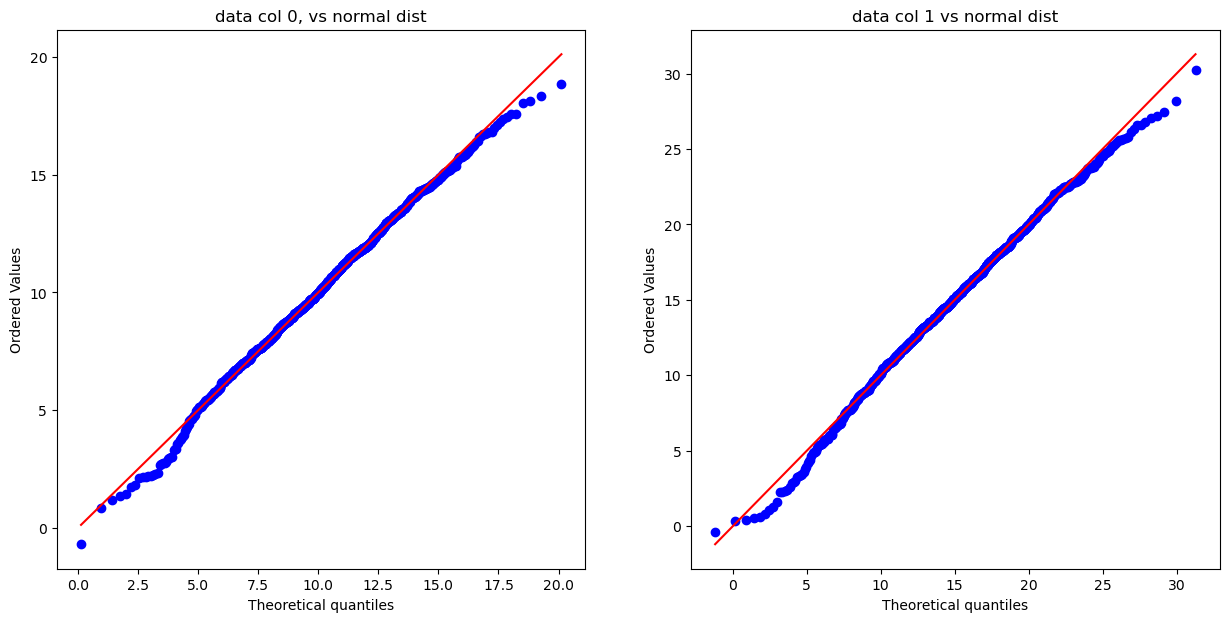

In [3]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(121)
st.probplot(data[0], [loc_0, std_0], dist=st.norm, plot=ax1)
ax1.set_title('data col 0, vs normal dist')
ax2 = plt.subplot(122)
st.probplot(data[1], [loc_1, std_1], dist=st.norm, plot=ax2)
ax2.set_title('data col 1 vs normal dist')



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.2:</b>   
Write two functions to compute the covariance and correlation coefficient between the two random variables. Print the results.
</p>
</div>

In [4]:
def covariance(x1,x2,mu_1, mu_2):
    return np.mean((x1 - mu_1)* (x2 - mu_2))

cov = covariance(data[0], data[1],loc_0, loc_1)

def correlation(x1, x2, mu_1, mu_2, std_0, std_1):
    return (covariance(x1, x2, mu_1, mu_2) / (std_0 * std_1))

rho = correlation(data[0], data[1],loc_0, loc_1, std_0, std_1)
print(cov, rho)

9.473166960914002 0.5973746669468999


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.3:</b>   
Build the bivariate distribution using <code>scipy.stats.multivariate_normal</code> (as well as the mean vector and covariance matrix). To validate the result, create a plot that shows contours of the joint PDF, compared with the data (see note below). Comment on the quality of the fit in 2-3 sentences or bullet points.
</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>Use the helper function <code>plot_contour</code> in <code>helper.py</code>; it was already imported above. Either look in the file to read it, or view the documentation in the notebook with <code>plot_contour?</code></p>

<p><em>Hint: for this Task use the optional </em><code>data</code><em> argument!.</em></p></div>

In [5]:
print(loc_0, loc_1, std_0, std_1, rho)
mu_12 = np.array([loc_0, loc_1])
cov_12 = np.array([[std_0**2, cov], [cov, std_1**2]])

10.124711 15.042626 3.1256827640499605 5.0734512576868225 0.5973746669468999


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$X_1$', ylabel='$X_2$'>)

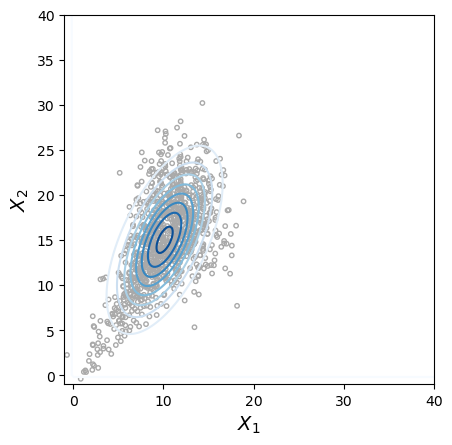

In [6]:
bivar_dist = st.multivariate_normal([loc_0, loc_1], [[std_0**2, cov],[cov, std_1**2]])

plot_contour(bivar_dist, xy_lim=[-1, 40, -1, 40], data=np.array(data.T))

## Task 2: Using the Bivariate Distribution

Now that we have the distribution, we will use it compute probabilities related to the three design cases, presented above, as follows:

1. $P(X_1>20)\cup P(X_2>20)$
2. $P(X_1>20)\cap P(X_2>20)$
3. $P(X_1,X_2:\; Z<0)$

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2:</b>
    
For each of the three cases, do the following:

<ol>
    <li>Compute the requested probability using the empirical distribution.</li>
    <li>Compute the requested probability using the bivariate distribution.</li>
    <li>Create a bivariate plot that includes PDF contours <em>and</em> the region of interest.</li>
    <li>Repeat the calculations for additional cases of correlation coefficient (+0.9, 0.0, -0.9) to see how the answer changes (you can simply regenerate the plot, you don't need to make multiple versions). <em>You can save this sub-task for later if you are running out of time. It is more important to get through Task 3 during the in-class session.</em></li>
    <li>Write two or three sentences that summarize the results and explains the quantitative impact of correlation coefficient. Make a particular note about whether or not one case may or be affected more or less than the others.</li>
</ol>
    

</p>
</div>

The cdf probability of Z < 0 is 0.005088296589123187


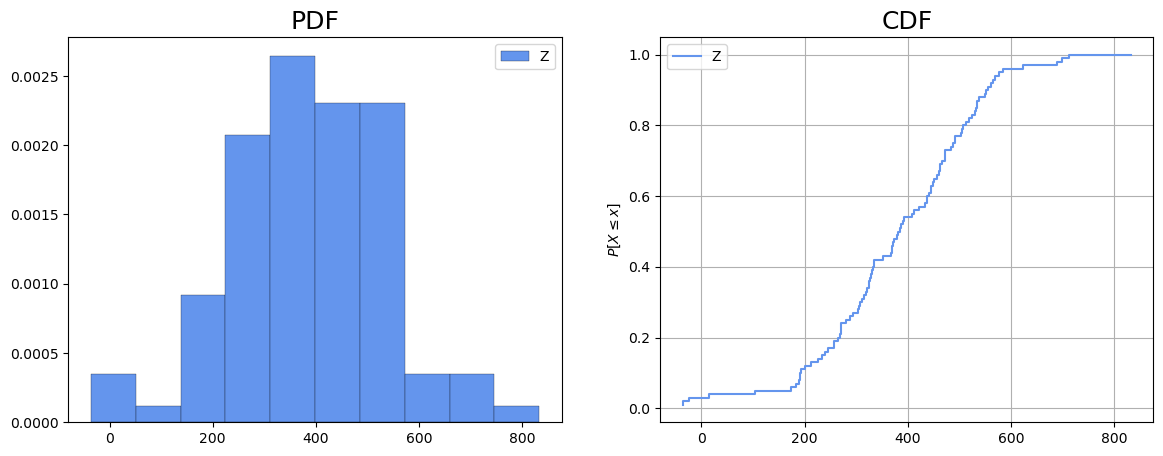

In [7]:
# Task 2.3 Georgi
def ecdf(data):
    #Your function here
    #x represents the values of the random variable
    #y represents the associated non-exceedance probabilities

    observed_values = data
    x = sorted(observed_values)

    # Calculate the length and non-exceedance probabilities
    length = len(x)
    y = [(i + 1) / length for i in range(length)]
    
    # plt.plot(x, y)
    # plt.xlabel("Values of the Random Variable (x)")
    # plt.ylabel("Probability of Not Exceeding")
    # plt.title("Non-Exceedance Probability Plot")
    # plt.grid(True)
    # plt.show()
    
    return [y, x]

def Z(x1,x2):
    return 800 - x1**2 - 20*x2

def prob_cdf(x, mu, sigma):
    return (1 + math.erf((0 - mu_Z) / np.sqrt(var_Z) / math.sqrt(2))) / 2


num_samples = 100
samples = st.multivariate_normal.rvs(mu_12,cov_12,size=num_samples)
samples_x1 = samples[:,0]
samples_x2 = samples[:,1]
#samples_x2 = st.multivariate_normal.rvs(mu_12[1],cov_12[1])
#print(samples_x1)

samples_Z = Z(samples_x1, samples_x2)
mu_Z = np.mean(samples_Z)
var_Z = np.var(samples_Z)

print(f"The cdf probability of Z < 0 is {prob_cdf(0,mu_Z, math.sqrt(var_Z))}")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(samples_Z, edgecolor='k', linewidth=0.2, 
             color='cornflowerblue', label='Z', density = True)
# axes[0].set_xlabel('Level [cm]')
# axes[0].set_ylabel('Density')
axes[0].set_title('PDF', fontsize=18)
axes[0].legend()

axes[1].step(ecdf(samples_Z)[1], ecdf(samples_Z)[0], 
             color='cornflowerblue', label='Z')
#axes[1].set_xlabel('Level [cm]')
axes[1].set_ylabel('${P[X \leq x]}$')
axes[1].set_title('CDF', fontsize=18)
axes[1].legend()
axes[1].grid()

In [8]:
#2.1
P_x1 = 1 - st.norm.cdf(20, loc_0, std_0)
P_x2 = 1 - st.norm.cdf(20, loc_1, std_1)
print(f'Union of 2.1 is {P_x1 + P_x2}')
print(f'Intersect of 2.1 is {P_x1 * P_x2}')

Union of 2.1 is 0.16504517813641373
Intersect of 2.1 is 0.00012983772508228718


In [9]:
#2.2 bivariate distribution
#(X1 > 20) ∪ (X2 > 20) 
Prob1 = 1 - bivar_dist.cdf([20, 20])
Px1 = 1-P_x1
Px2 = 1-P_x2
Prob2 = Px1 + Px2 - (1-Prob1)

print(f'Union of 2.2 is {Prob1}')
print(f'Probability of intersection is {1 - Prob2}')

#Calculate P(X1, X2:Z<0)


Union of 2.2 is 0.16432913331221743
Probability of intersection is 0.0007160448241962936


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$X_1$', ylabel='$X_2$'>)

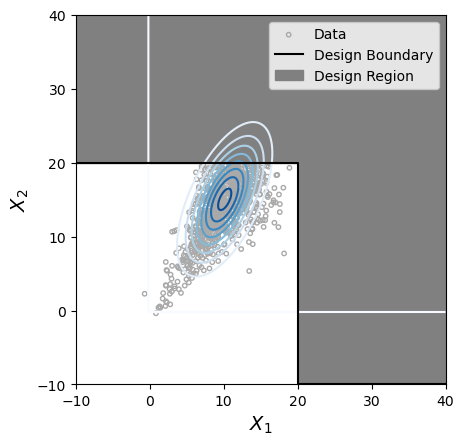

In [10]:
#2.3 plot

plot_contour(bivar_dist, xy_lim=[-10, 40, -10, 40], data=np.array(data.T), design_region=np.array([[-10, 20, 20, 40],[20, 20, -10, -10]]))

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$X_1$', ylabel='$X_2$'>)

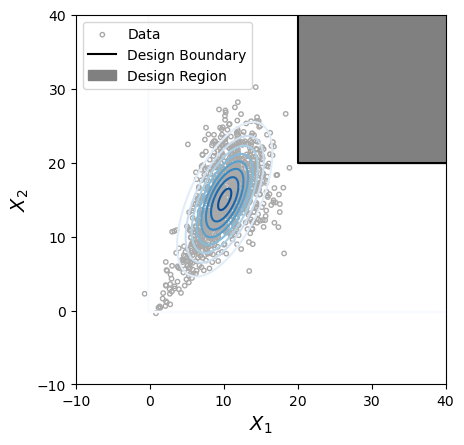

In [11]:
plot_contour(bivar_dist, xy_lim=[-10, 40, -10, 40], data=np.array(data.T), design_region=np.array([[20, 20, 40],[40, 20, 20]]))

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$X_1$', ylabel='$X_2$'>)

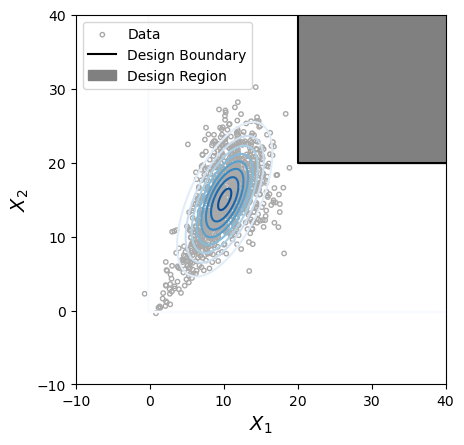

In [12]:
plot_contour(bivar_dist, xy_lim=[-10, 40, -10, 40], data=np.array(data.T), design_region=np.array([[20, 20, 40],[40, 20, 20]]))
# use function to get boundaries.

Question 5

increasing correlation coefficient results in a higher likelihood of observing high values of 
and therefore the design value increases. The opposite is true with no dependence, as well as negative dependence.

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>Note that the optional arguments in the helper function <code>plot_contour</code> will be useful here--also for the Project on Friday!</p></div>

In [13]:
# YOUR_CODE_HERE

## Task 3: Validate Bivariate with Monte Carlo Simulation

Now that we have seen how the different design cases give different values of probability, let's focus on the function of random variables. This is a more interesting case because, unlike the AND and OR cases, which only give single probability values, we can use the empirical distribution of $Z$ to help validate the bivariate model.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3:</b>
    
Do the following:

<ol>
    <li>Use Monte Carlo Simulation to create a sample of $Z(X_1,X_2)$ and compare this distribution to the empirical distribution.</li>
    <li>Write 2-3 sentences assessing the quality of the distribution from MCS, and whether the bivariate distribution is acceptable for this problem. Use qualitative and quantitative measures from last week to support your arguments.</li>
</ol>
    
</p>
<p>
    <em>Note: you do not need to fit a parametric distribution to the MCS sample.</em>
</p>
</div>

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png"/>
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png"/>
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2023 <a rel="MUDE Team" href="https://studiegids.tudelft.nl/a101_displayCourse.do?course_id=65595">MUDE Teaching Team</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3d7f3b5e-e62d-440d-96d4-375ec89ef4ee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>